In [1]:
import numpy as np
import pandas as pd
import time
import random
import pickle
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.models import load_model
from keras import optimizers
from scipy import ndimage, misc
from tqdm import tqdm
import gym
import matplotlib.pyplot as plt
import time

t0 = time.time()

Using TensorFlow backend.


In [2]:
def plot_state(obs):
    plt.figure(figsize=(12,8))
    plt.imshow(obs)
    plt.axis("off")
    plt.show()

In [3]:
def process_obs(obs):
    obs = obs.max(axis=-1,keepdims=1)
    obs = obs.reshape((210,160))
    obs = misc.imresize(obs, (110,84))
    lives = obs[2:9,52:59]
    obs = obs[18:102,:,]
    obs = np.expand_dims(obs,2)
    obs = obs.astype("float32") / 255
    obs[obs > 0] = 1
    return [obs,lives]

Welcome to AI Breakout!
Starting Test Game...



/Users/samwilliams/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


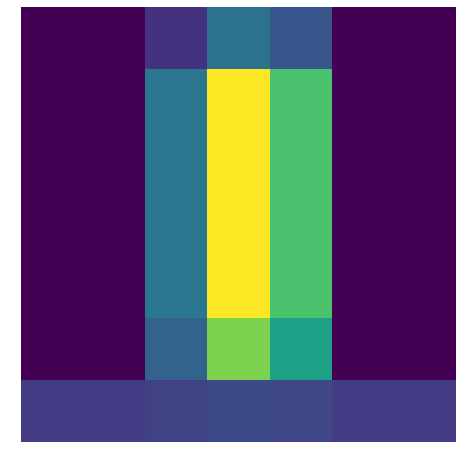

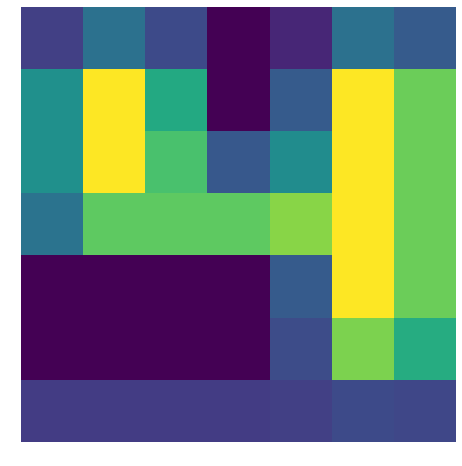

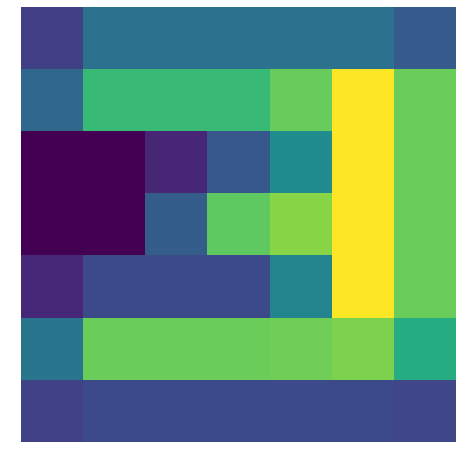

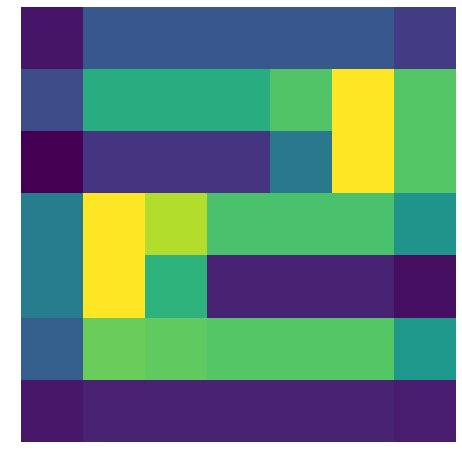

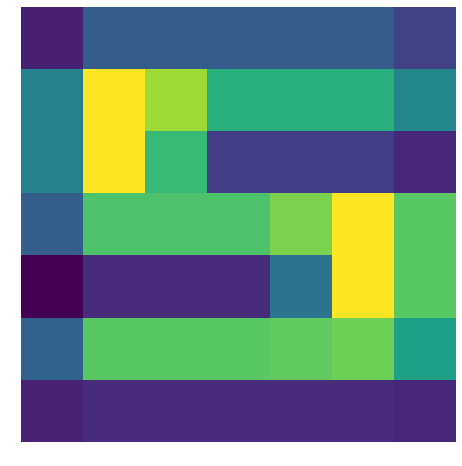

In [4]:
episodes = 1
env = gym.make("Breakout-v0")
init = env.reset()

for i in range(episodes):
    print("Welcome to AI Breakout!")
    print("Starting Test Game...\n")

    
    game = True
    LIVES = []
    while game:
        
        action = env.action_space.sample()
        
        observation, reward, done, info = env.step(action)
        observation, lives = process_obs(observation)
        LIVES.append(lives)
        
        if done:
            
            LIVES = np.unique(np.array(LIVES), axis=0)
            
            for i in LIVES:
                plot_state(i.reshape(7,7))
            game = False
            observation = env.reset()
                             
        else:
            pass
            
         

In [5]:
env = gym.make("Breakout-v0")
init = env.reset()

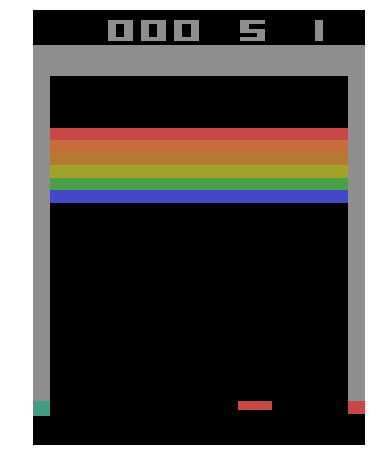

In [6]:
plot_state(init)

In [7]:
init.shape

(210, 160, 3)

In [8]:
I = process_obs(init)[0]

/Users/samwilliams/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [9]:
I.shape

(84, 84, 1)

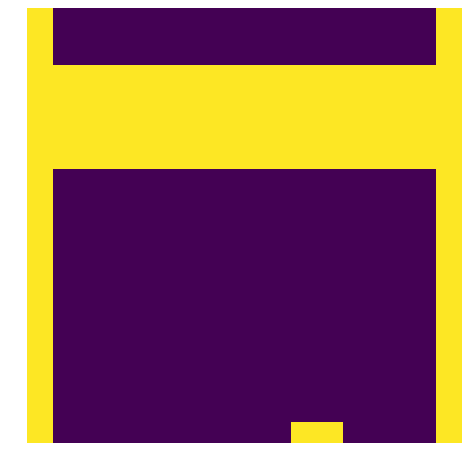

In [10]:
plot_state(I.reshape(84,84))

In [11]:
env.action_space

Discrete(4)

In [12]:
inp = Input(shape=(84,84,4))
x = Conv2D(16, (8,8), strides=4, activation="relu", input_shape=(84,84,4))(inp)
x = Conv2D(32, (4,4), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dense(256,  activation="relu")(x)
output = Dense(env.action_space.n)(x)

model = Model(inp, output)
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor="loss", factor=0.01, patience=2, mode = min, verbose = 1)]
model.compile(loss='mean_squared_error', optimizer=optimizers.RMSprop(lr=0.00025, rho=0.95, epsilon=0.01), metrics=["mae"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        4112      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          8224      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               663808    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 677,172
Trainable params: 677,172
Non-trainable params: 0
_________________________________________________________________
None

/Users/samwilliams/homebrew/lib/python3.7/site-packages/keras/callbacks.py:1086: RuntimeWarning: Learning Rate Plateau Reducing mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


In [13]:
LIFE = {}
LIFE["1"] = LIVES[0]
LIFE["2"] = LIVES[3]
LIFE["3"] = LIVES[2]
LIFE["4"] = LIVES[1]
LIFE["5"] = LIVES[4]

In [14]:
for i,j in LIFE.items():
    print(i)

1
2
3
4
5


In [36]:
full_episode_history = {"state" : np.zeros(shape=(70000,84,84,4), dtype=np.uint8),\
                        "reward" : np.zeros(shape=(70000,), dtype=np.int16),\
                        "action": np.zeros(shape=(70000,), dtype=np.int16), \
                        "Q": np.zeros(shape=(70000,4), dtype="float32")}

/Users/samwilliams/homebrew/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
  0%|          | 0/150000 [00:00<?, ?it/s]

Welcome to AI Breakout!
Starting Game 1 of 150000...



/Users/samwilliams/homebrew/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/samwilliams/homebrew/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 1/150000 [00:02<92:52:25,  2.23s/it]

Average game score: nan
Total frames so far: 75
Epsilon: 1.0



  1%|          | 999/150000 [21:01<54:42:22,  1.32s/it]

Welcome to AI Breakout!
Starting Game 1000 of 150000...

Average game score: 1.66
Total frames so far: 67911
Epsilon: 0.95249



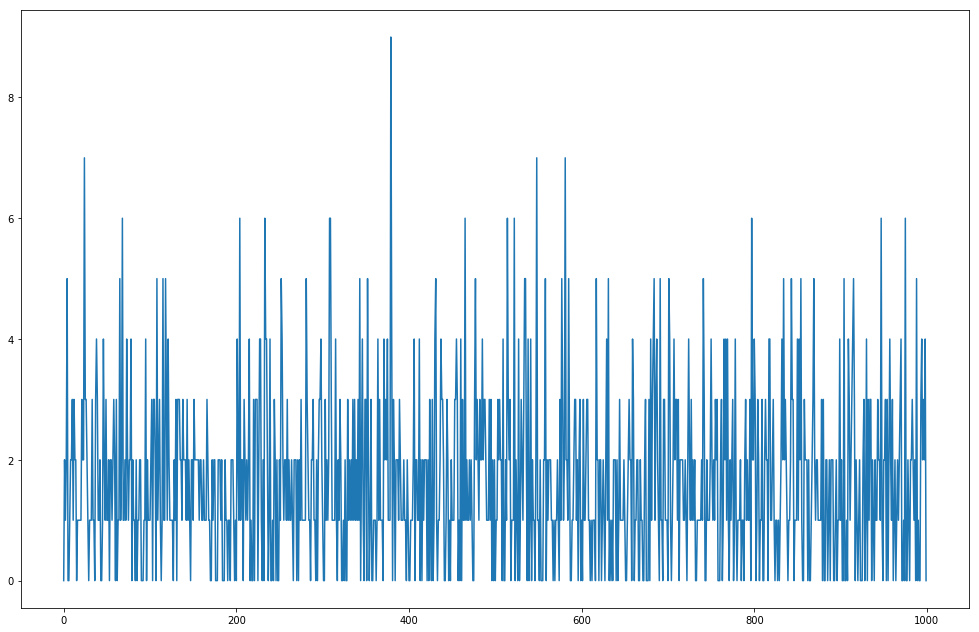

  1%|          | 1479/150000 [31:20<51:38:15,  1.25s/it]

OSError: [Errno 22] Invalid argument

In [16]:
env = gym.make("Breakout-v0")
observation = env.reset()
observation, lives = process_obs(observation)

episodes = 150000
episode_scores = np.zeros(shape=(150000))
total_frames = 0
sum_total_frames = 0
count = 1
epsilon = 1.0
gamma = 0.99
done = False

for i in tqdm(range(1, episodes+1)):
    
    if (i % 1000 == 0) or (i == 1):
        print("Welcome to AI Breakout!")
        print("Starting Game {} of {}...\n".format(i, episodes))
    
    sum = 0
    episode_frame = 1
    game = True
    LIVES = []
    observation_batch = []
    reward_batch = []
    episode_history = {"state" : np.array([]), "reward" : np.array([]), "action": np.array([]), "Q": np.array([])}

    while game: 
        if (episode_frame == 1):
            action = 1              
        else:
            if (episode_frame - 1) % 4 == 0:
                rand = np.random.uniform(0,1)
                if  rand < epsilon:
                    action = env.action_space.sample()
                else:
                    observation = np.expand_dims(episode_history["state"][-1],0)
                    action = np.argmax(model.predict(observation))
                
                if len(episode_history["state"]) > 2:
                    if np.array_equal(episode_history["state"][-1], episode_history["state"][-2]):
                        action = 1
                    else:
                        pass
                else:
                    pass
                observation_batch = []
                reward_batch = []
                
            else:
                pass
            
        
        observation, reward, done, info = env.step(action)
        observation, lives = process_obs(observation)
        
        if len(LIVES) == 0:
            LIVES.append(lives)
            loss = 0
        else:
            if np.array_equal(LIVES[-1], lives):
                loss = 0
            else:
                LIVES.append(lives)
                loss = -10
                
        observation_batch.append(observation)
        reward_batch.append(10*reward+loss)        
        
        if (episode_frame % 4 == 0):
            if episode_frame == 4:
                episode_history["state"] = np.concatenate([i for i in observation_batch], axis=-1)
                episode_history["state"] = np.expand_dims(episode_history["state"],0)

            else:
                obs = np.concatenate([i for i in observation_batch], axis=-1)
                obs = np.expand_dims(obs,0)
                episode_history["state"] = np.concatenate([episode_history["state"], obs], axis=0)

            episode_history["reward"] = np.concatenate([episode_history["reward"], np.array([np.sum(reward_batch)])], axis = 0)  
            episode_history["action"] = np.concatenate([episode_history["action"], np.array([action])], axis=0)
         
        sum += reward
        episode_frame += 1
        
        if done:
            total_frames += episode_history["state"].shape[0]
            sum_total_frames += episode_history["state"].shape[0]
            
            for j,k in enumerate(episode_history["reward"][::-1]):
                
                if j == 0:
                    val = np.array([[0, 0, 0, 0]], dtype="float32")
                    val[0,int(episode_history["action"][-1])] = k
                    Q = val
                else:
                    val = np.array([[0, 0, 0, 0]], dtype="float32")
                    val[0,int(episode_history["action"][-1-j])] = k + gamma*np.sum(Q[-1])
                    Q = np.concatenate([Q,val], axis = 0)

            Q = Q[::-1]
            episode_history["Q"] = Q
            
            try:
                full_episode_history["state"][total_frames - episode_history["state"].shape[0]: total_frames,:,:,:] = episode_history["state"]
                full_episode_history["reward"][total_frames - episode_history["state"].shape[0]: total_frames] = episode_history["reward"]
                full_episode_history["action"][total_frames - episode_history["state"].shape[0]: total_frames] = episode_history["action"]
                full_episode_history["Q"][total_frames - episode_history["state"].shape[0]: total_frames,:] = episode_history["Q"]
                
            except:
                
                with open("RL-atari-batch-data-{}.pkl".format(count), "wb") as f:
                    pickle.dump(full_episode_history, f)
                
                count += 1
                total_frames = episode_history["state"].shape[0]
                full_episode_history = {"state" : np.zeros(shape=(70000,84,84,4), dtype=np.uint8),\
                                        "reward" : np.zeros(shape=(70000,), dtype=np.int16),\
                                        "action": np.zeros(shape=(70000,), dtype=np.int16), \
                                        "Q": np.zeros(shape=(70000,4), dtype="float32")}
                
                full_episode_history["state"][total_frames - episode_history["state"].shape[0]: total_frames,:,:,:] = episode_history["state"]
                full_episode_history["reward"][total_frames - episode_history["state"].shape[0]: total_frames] = episode_history["reward"]
                full_episode_history["action"][total_frames - episode_history["state"].shape[0]: total_frames] = episode_history["action"]
                full_episode_history["Q"][total_frames - episode_history["state"].shape[0]: total_frames,:] = episode_history["Q"]


            #print("Training the model from a random batch...")
            
            try:
                mask = np.random.choice(range(total_frames), size=128)
                inp = full_episode_history["state"][mask]
                target = full_episode_history["Q"][mask]
                model.fit(inp, target, epochs = 5, batch_size=8, verbose=0)
                
            except:
                pass
            
            if (i % 1000 == 0) or (i == 1): 
                print("Average game score: {}".format(np.mean(episode_scores[i-1000:i])))
                print("Total frames so far: {}".format(sum_total_frames))
                print("Epsilon: {}\n".format(epsilon))
             
            if (i % 1000 == 0):
                plt.figure(figsize=(17,11))
                plt.plot(episode_scores[i-1000:i])
                plt.show()
            
            observation = env.reset()
            observation, lives = process_obs(observation)
            episode_scores[i] = sum
            
            m = -7e-7
            epsilon = round(m*sum_total_frames +1,5)
            if epsilon < 0.1:
                epsilon = 0.1
            game = False
            episode_frame = 0
                             
        else:
            pass
            
         

In [40]:
from sys import getsizeof

getsizeof(full_episode_history)

240

In [41]:
print(full_episode_history["state"].nbytes/1024**3)
print(episode_history["reward"].shape)
print(episode_history["action"].shape)
print(episode_history["Q"].shape)

1.8399953842163086
(107,)
(107,)
(107, 4)


In [ ]:
print(episode_history["reward"][:])

In [ ]:
print(episode_history["action"])

In [ ]:
print(episode_history["Q"])

In [ ]:
model.predict(np.expand_dims(episode_history["state"][10],0))

In [ ]:
pd.Series(episode_scores).value_counts()

In [ ]:
print("Time taken: {}".format((time.time() - t0)/3600))

# Saving Model

In [ ]:
model.save("breakout-atari-rl.h5")

# Testing the Model

In [ ]:
"""
mod = load_model("breakout-atari-rl.h5")
env = gym.make("Breakout-v0")
observation = env.reset()
observation, lives = process_obs(observation)

episodes = 10
done = False

for i in range(1, episodes+1):
    print("Welcome to AI Breakout!")
    print("Starting Game {} of {}...".format(i, episodes))
    
    sum = 0
    frame = 1
    game = True
    observation_batch = []
    while game:

        if (frame == 1):
            action = 1              
        else:
            if (frame - 1) % 4 == 0:
                action = np.argmax(mod.predict(states))

                if np.array_equal(states[0][:84,:84,0], states[0][:84,:84,3]):
                    action = 1
                else:
                    pass
                
                observation_batch = []                
            else:
                pass
            
        
        observation, reward, done, info = env.step(action)
        observation, lives = process_obs(observation)
        observation_batch.append(observation)
        
        if (frame % 4 == 0):
            states = np.concatenate([i for i in observation_batch], axis=-1)
            states = np.expand_dims(states,0)

        sum += reward
        frame += 1
        time.sleep(0.03)
        env.render()

        if done:
            print("Total game score was: {}\n".format(int(sum)))
            observation = env.reset()
            observation, lives = process_obs(observation)
            game = False
env.close()        
"""